In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ydata_profiling as pp
import warnings
%matplotlib inline
warnings.filterwarnings(category=FutureWarning, action= "ignore")

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [3]:
# Import datasets
healthcare_data =pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Dataverse Africa Internship\\Hypertensio-heartdisease-1 (1).csv")
reference_data =pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Dataverse Africa Internship\\Hyper-disease.csv")

In [4]:
# View data snippets
healthcare_data.head()


HeartDisease-Hypertension)    BMI Smoking AlcoholDrinking Stroke  \
0                         No  16.60     Yes              No     No   
1                         No  20.34      No              No    Yes   
2                         No  26.58     Yes              No     No   
3                         No  24.21      No              No     No   
4                         No  23.71      No              No     No   

   PhysicalHealth  MentalHealth DiffWalking     Sex  AgeCategory Diabetic  \
0               3          30.0          No  Female        55-59      Yes   
1               0           0.0          No  Female  80 or older       No   
2              20          30.0          No    Male        65-69      Yes   
3               0           0.0          No  Female        75-79       No   
4              28           0.0         Yes  Female        40-44       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
0              Yes  Very good        5.0    Yes            No        Yes   
1              Yes  Very good        7.0     No            No         No   
2              Yes       Fair        8.0    Yes            No         No   
3               No       Good        6.0     No            No        Yes   
4              Yes  Very good        8.0     No            No         No   

    Tribe  
0  Yoruba  
1  Yoruba  
2  Yoruba  
3  Yoruba  
4  Yoruba

In [5]:
# rename columns for better clarity 
healthcare_data.rename(columns={'HeartDisease-Hypertension)':'Hypertension'}, inplace=True)
healthcare_data.rename(columns={'Sex':'Gender'}, inplace=True)
reference_data.rename(columns={'Sex':'Gender'}, inplace=True)

In [6]:
healthcare_data.head()

Hypertension    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking  Gender  AgeCategory Diabetic PhysicalActivity  \
0          30.0          No  Female        55-59      Yes              Yes   
1           0.0          No  Female  80 or older       No              Yes   
2          30.0          No    Male        65-69      Yes              Yes   
3           0.0          No  Female        75-79       No               No   
4           0.0         Yes  Female        40-44       No              Yes   

   GenHealth  SleepTime Asthma KidneyDisease SkinCancer   Tribe  
0  Very good        5.0    Yes            No        Yes  Yoruba  
1  Very good        7.0     No            No         No  Yoruba  
2       Fair        8.0    Yes            No         No  Yoruba  
3       Good        6.0     No            No        Yes  Yoruba  
4  Very good        8.0     No            No         No  Yoruba

In [7]:
# Examining datasets

reference_data.head()
print("Columns in original data: \n", healthcare_data.columns, "\n")
print("Columns in reference data: \n", reference_data.columns, "\n")
print("Original data description: \n", healthcare_data.describe(), "\n")
print("Reference data description: \n", reference_data.describe(), "\n")
print("Number of missing values in reference data are: \n", reference_data.isnull().sum())

Columns in original data: 
 Index(['Hypertension', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Gender',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Tribe'],
      dtype='object') 

Columns in reference data: 
 Index(['HeartDisease-Hypertension)', 'BMI', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Gender',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Tribe'],
      dtype='object') 

Original data description: 
                  BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319794.000000  319791.000000
mean       28.325399         3.37171       3.898378       7.097079
std         6.356100         7.95085       7.955245       1.436013
min        12.020000         0.00000

In [8]:
#Profile Report
pp.ProfileReport(healthcare_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Check for missing values

Missing_values = healthcare_data.isnull().sum()
print("Below are the missing values:\n\n", Missing_values)

Below are the missing values:

 Hypertension         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               5
PhysicalHealth       0
MentalHealth         1
DiffWalking          0
Gender               4
AgeCategory          0
Diabetic            14
PhysicalActivity    11
GenHealth            0
SleepTime            4
Asthma               6
KidneyDisease        6
SkinCancer           9
Tribe                0
dtype: int64


In [10]:
# Handle missing values by filling with corresponding values in reference data

healthcare_data.fillna(reference_data, inplace=True)

# Confirm if change is reflected
healthcare_data.isnull().sum()

Hypertension        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Gender              0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Tribe               0
dtype: int64

In [11]:
# Check for duplicates

duplicates = healthcare_data.duplicated().sum()
print("The number of duplicates are:", duplicates)

The number of duplicates are: 18078


In [12]:
# Drop duplicate values 

healthcare_data.drop_duplicates(inplace=True)
print("The updated number of duplicates are:", healthcare_data.duplicated().sum())

The updated number of duplicates are: 0


In [13]:
# Ensure there are no accidental spaces in column names

healthcare_data.columns = healthcare_data.columns.str.strip()

In [14]:
# Check for data entry error or inconsistencies

print("Unique Smoking:\n", healthcare_data["Smoking"].unique(), "\n")
print("Unique Alcoholics:\n", healthcare_data["AlcoholDrinking"].unique(), "\n")
print("Unique Stroke:\n", healthcare_data["Stroke"].unique(), "\n")
print("Unique DiffWalking :\n", healthcare_data["DiffWalking"].unique(), "\n")
print("Unique sex:\n", healthcare_data["Gender"].unique(), "\n")
print("Unique AgeCategory:\n", healthcare_data["AgeCategory"].unique(), "\n")
print("Unique Diabetic:\n", healthcare_data["Diabetic"].unique(), "\n")
print("Unique Activity:\n", healthcare_data["PhysicalActivity"].unique(), "\n")
print("Unique Health:\n", healthcare_data["GenHealth"].unique(), "\n")
print("Unique Asthma:\n", healthcare_data["Asthma"].unique(), "\n")
print("Unique KidenyD:\n", healthcare_data["KidneyDisease"].unique(), "\n")
print("Unique Skincancer:\n", healthcare_data["SkinCancer"].unique(), "\n")
print("Unique Tribe:\n", healthcare_data["Tribe"].unique(), "\n")

Unique Smoking:
 ['Yes' 'No'] 

Unique Alcoholics:
 ['No' 'Yes'] 

Unique Stroke:
 ['No' 'Yes'] 

Unique DiffWalking :
 ['No' 'Yes'] 

Unique sex:
 ['Female' 'Male'] 

Unique AgeCategory:
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Unique Diabetic:
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

Unique Activity:
 ['Yes' 'No'] 

Unique Health:
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Unique Asthma:
 ['Yes' 'No'] 

Unique KidenyD:
 ['No' 'Yes'] 

Unique Skincancer:
 ['Yes' 'No'] 

Unique Tribe:
 ['Yoruba' 'Hausa Fulani' 'Ibibio' 'Tiv' 'Other' 'Igbo'] 



In [15]:
# Check for outliers in the BMI column

Q1 = healthcare_data['BMI'].quantile(0.25)
Q3 = healthcare_data['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = healthcare_data[(healthcare_data['BMI'] < lower_bound) | (healthcare_data['BMI'] > upper_bound)]

if outliers.empty:
    print("No outliers detected!")
else:
    print("Number of outliers in BMI:", str(outliers.shape[0]) + "(2.8%)")

# Checking the distribution of outliers
print("Outliers below", lower_bound,":", healthcare_data[healthcare_data['BMI'] < lower_bound].shape[0])
print("Outliers above", upper_bound,":", healthcare_data[healthcare_data['BMI'] > upper_bound].shape[0])

Number of outliers in BMI: 8905(2.8%)
Outliers below 12.600000000000005 : 24
Outliers above 43.08 : 8881


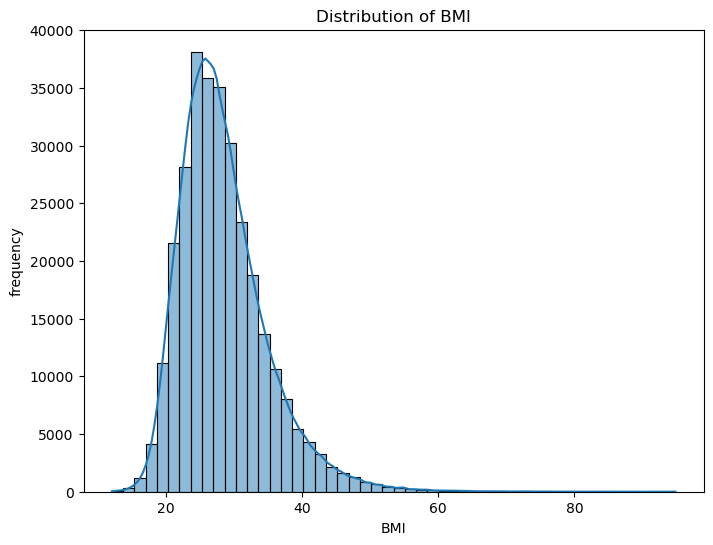

In [16]:
# let's see what our BMI distribution looks like

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))
sns.histplot(healthcare_data['BMI'], bins=50, kde=True)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.title('Distribution of BMI')
plt.show()

The distribution is right skewed meaning that there are more lower BMI values than higher BMI values and a long tail extends towards the
higher BMI values.
This confirms the presence of outliers especially at the high end (BMI > 43).
Most people have BMI between 18 and 40 but there are extreme cases between 60 and 80


In [17]:
# we are handling this outliers using the segmentation method, we will assign BMI categories according to the standard WHO BMI categories

bmi_bins = [0,18.5,24.9,29.9,39.9,float('inf')]
bmi_labels = ['Underweight','Normalweight','Overweight','Obese','Extremely Obese']

healthcare_data['BMICategory'] = pd.cut(healthcare_data['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)

print(healthcare_data['BMICategory'].value_counts())

BMICategory
Overweight         105585
Normalweight        88858
Obese               85531
Extremely Obese     16656
Underweight          5087
Name: count, dtype: int64


In [18]:
healthcare_data.head()

Hypertension    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking  Gender  AgeCategory Diabetic PhysicalActivity  \
0          30.0          No  Female        55-59      Yes              Yes   
1           0.0          No  Female  80 or older       No              Yes   
2          30.0          No    Male        65-69      Yes              Yes   
3           0.0          No  Female        75-79       No               No   
4           0.0         Yes  Female        40-44       No              Yes   

   GenHealth  SleepTime Asthma KidneyDisease SkinCancer   Tribe   BMICategory  
0  Very good        5.0    Yes            No        Yes  Yoruba   Underweight  
1  Very good        7.0     No            No         No  Yoruba  Normalweight  
2       Fair        8.0    Yes            No         No  Yoruba    Overweight  
3       Good        6.0     No            No        Yes  Yoruba  Normalweight  
4  Very good        8.0     No            No         No  Yoruba  Normalweight

In [19]:
#saving the cleaned dataset
healthcare_data.to_csv(r"C:\Users\HP\OneDrive\Desktop\Dataverse Africa Internship\Heartdisease.csv", index=False)


## Exploratory Data Analysis

Hypertensive Patients by BMI Category: 
 BMICategory
Underweight         401
Normalweight       6134
Overweight         9893
Obese              8989
Extremely Obese    1844
Name: Hypertension, dtype: int64


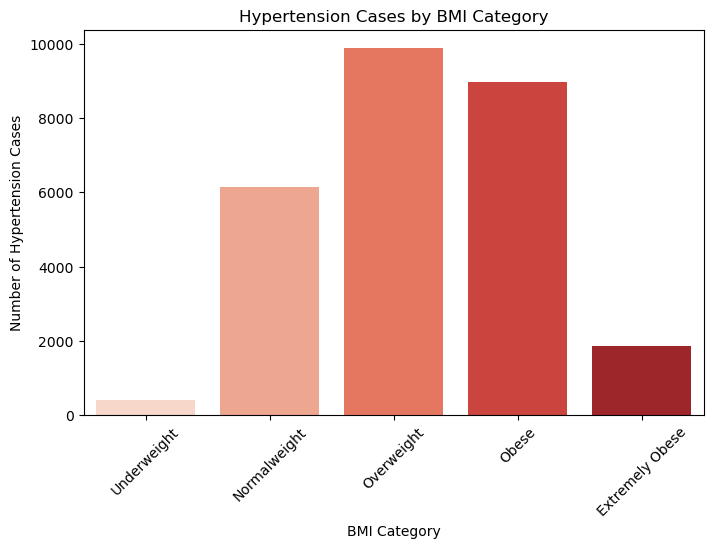

In [20]:
# Count the number of patients with hypertension in each BMI category
bmi_hypertension_counts = healthcare_data[healthcare_data['Hypertension'] == 'Yes'].groupby('BMICategory')['Hypertension'].count()

# Display results
print("Hypertensive Patients by BMI Category: \n", bmi_hypertension_counts)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=bmi_hypertension_counts.index, y=bmi_hypertension_counts.values, palette="Reds")
plt.xlabel("BMI Category")
plt.ylabel("Number of Hypertension Cases")
plt.title("Hypertension Cases by BMI Category")
plt.xticks(rotation=45)
plt.show()


The bar chart shows the number of hypertension cases across different BMI categories, overweight individuals have the highest cases, followed by obese individuals. Normal-weight individuals also have a significant number, while underweight and extremely obese groups have the least cases. This suggests a strong correlation between higher BMI and an increased risk of hypertension.

Hypertensive Patients by Age Category: 
 AgeCategory
18-24           130
25-29           133
30-34           226
35-39           296
40-44           486
45-49           743
50-54          1383
55-59          2199
60-64          3321
65-69          4074
70-74          4817
75-79          4027
80 or older    5426
Name: Hypertension, dtype: int64


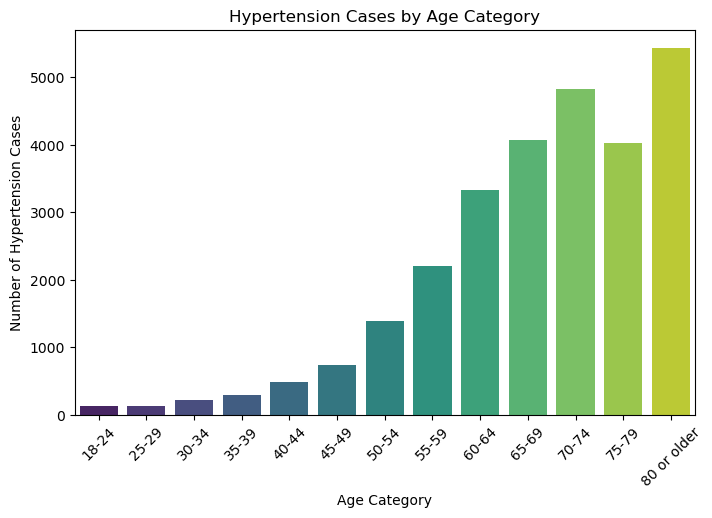

In [21]:
# Count the number of patients with hypertension in each BMI category
age_hypertension_counts = healthcare_data[healthcare_data['Hypertension'] == 'Yes'].groupby('AgeCategory')['Hypertension'].count()

# Display results
print("Hypertensive Patients by Age Category: \n", age_hypertension_counts)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=age_hypertension_counts.index, y=age_hypertension_counts.values, palette="viridis")
plt.xlabel("Age Category")
plt.ylabel("Number of Hypertension Cases")
plt.title("Hypertension Cases by Age Category")
plt.xticks(rotation=45)
plt.show()


The trend indicates that hypertension prevalence increases with age, with the highest number of cases observed in individuals aged 80 and older. The number of cases is relatively low in younger age groups (18-44) but begins to rise significantly from age 50 onward, peaking in the 70-74 and 80+ age groups. This suggests that **age is a strong risk factor for hypertension**, emphasizing the need for early screening and preventive health measures for older adults.

## Univariate Analysis 


In [22]:
#Summary statistics for numerical variables
numeric_summary = healthcare_data.describe()

#Summary of categorical variables
categorical_summary = healthcare_data.describe(include="object")

#Distribution of target variable (HeartDisease-Hypertension)
target_distribution = healthcare_data["Hypertension"].value_counts(normalize=True) * 100

numeric_summary, categorical_summary, target_distribution

(                 BMI  PhysicalHealth   MentalHealth      SleepTime
 count  301717.000000   301717.000000  301717.000000  301717.000000
 mean       28.441970        3.572298       4.121475       7.084559
 std         6.468134        8.140656       8.128288       1.467122
 min        12.020000        0.000000       0.000000       1.000000
 25%        24.030000        0.000000       0.000000       6.000000
 50%        27.410000        0.000000       0.000000       7.000000
 75%        31.650000        2.000000       4.000000       8.000000
 max        94.850000       30.000000      30.000000      24.000000,
        Hypertension Smoking AlcoholDrinking  Stroke DiffWalking  Gender  \
 count        301717  301717          301717  301717      301717  301717   
 unique            2       2               2       2           2       2   
 top              No      No              No      No          No  Female   
 freq         274456  174312          280136  289653      257362  159671   
 
     

In [23]:
# Distribution of AgeCategory

healthcare_data["AgeCategory"].value_counts()


AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

Hypertension
No     0.909647
Yes    0.090353
Name: proportion, dtype: float64


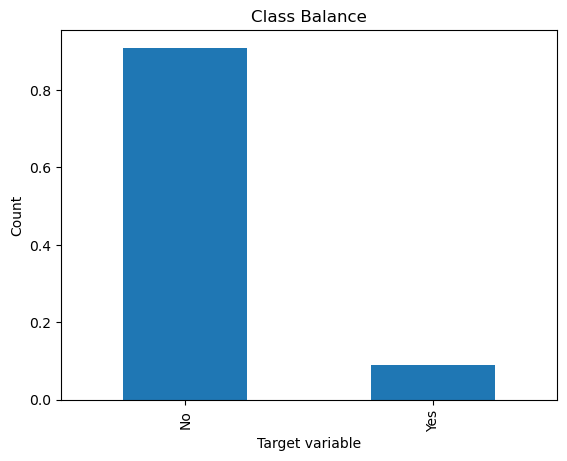

In [24]:
#Distribution of the target variable
print(healthcare_data["Hypertension"].value_counts(normalize=True))

# Visualizing the distribution
healthcare_data["Hypertension"].value_counts(normalize=True).plot(kind="bar")
plt.title("Class Balance")
plt.xlabel("Target variable")
plt.ylabel("Count");

There is an class imbalance in our dataset
90.96% of cases belong to the "No" class.
Only 9.04% of cases belong to the "Yes" class.
If our model is trained using this data, it might perform poorly because it will favor the "No" class. The accuracy might be misleading

We can resample our data using different techniques to ensure that our classes are balanced
we can use weighted models such as randomforest classifier, Logistic regression to deal with this

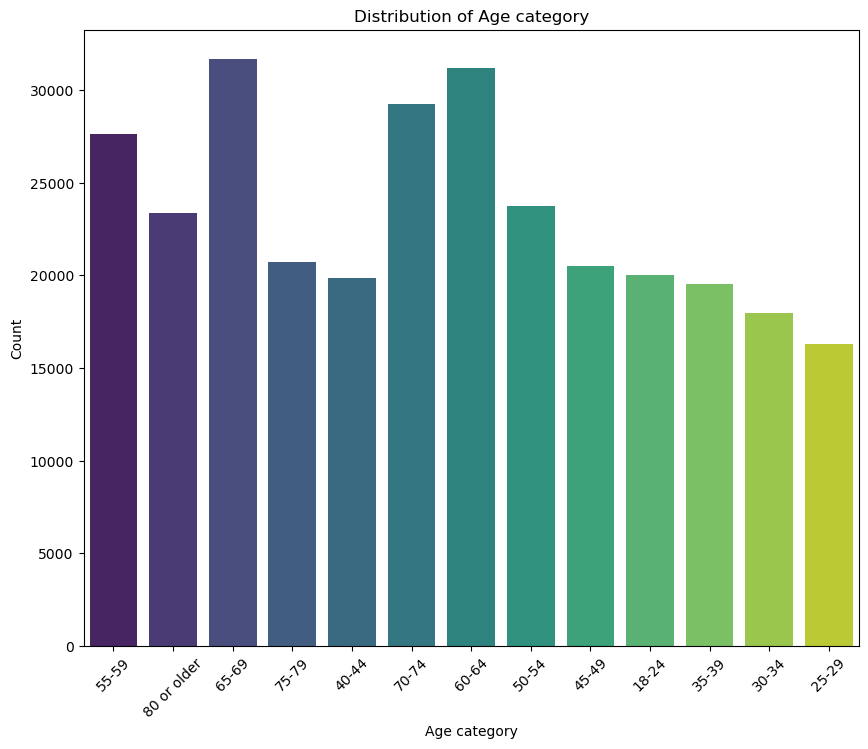

In [25]:
#Distribution of Age
plt.figure(figsize=(10,8))
sns.countplot(x=healthcare_data["AgeCategory"], palette="viridis", )
plt.title("Distribution of Age category")
plt.ylabel("Count")
plt.xlabel("Age category")
plt.xticks(rotation= 45);

The bar chart displays the distribution of individuals across different age categories, showing that the highest counts are in the 65-69, 60-64, and 70-74 age groups. The younger age groups (25-29, 30-34) have the lowest counts, suggesting that the dataset primarily consists of older individuals. 

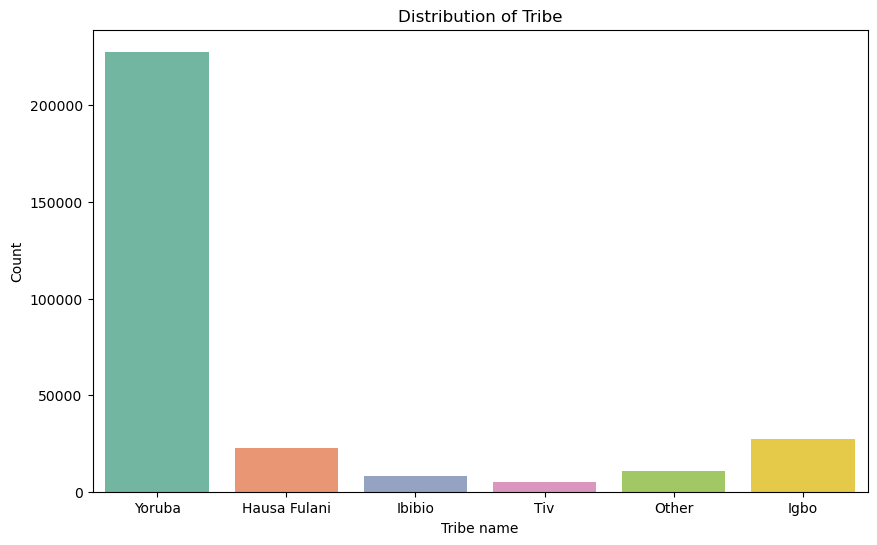

In [26]:
#Distribution of Tribe
plt.figure(figsize=(10,6))
sns.countplot(x=healthcare_data["Tribe"], palette="Set2")
plt.title("Distribution of Tribe")
plt.xlabel("Tribe name")
plt.ylabel("Count");

This bar chart shows the distribution of Tribes in our dataset. The Yoruba tribe has the highest count

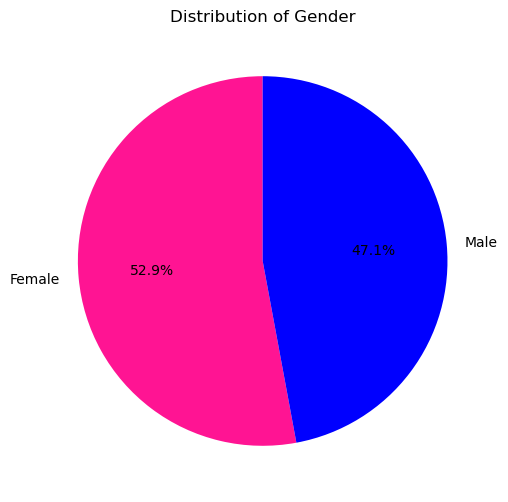

In [27]:
# Distribution of Gender
# Count occurrences of each category
sex_counts = healthcare_data["Gender"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", colors=["deeppink", "blue"], startangle=90)
plt.title("Distribution of Gender")
plt.show()


Our dataset set contains more females than males

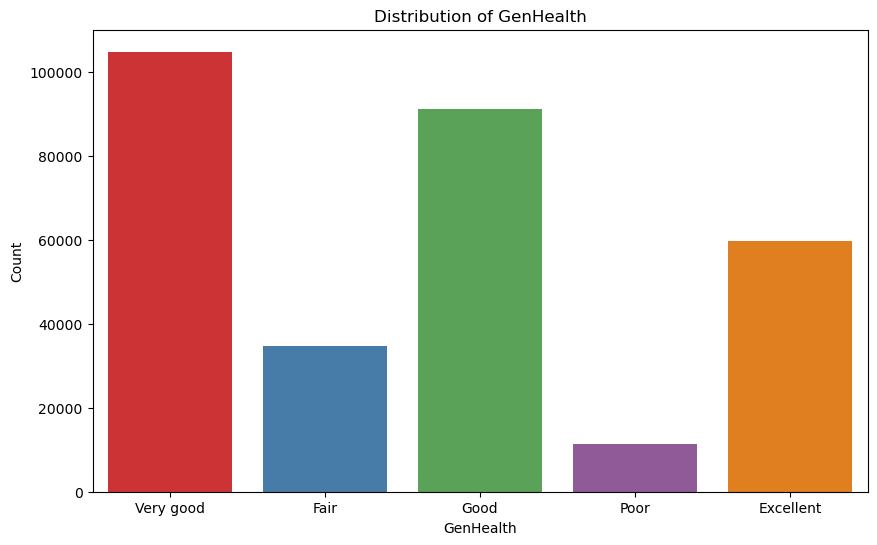

In [28]:
#Distribution of GenHealth
plt.figure(figsize=(10,6))
sns.countplot(x=healthcare_data["GenHealth"], palette='Set1')
plt.title("Distribution of GenHealth")
plt.xlabel("GenHealth")
plt.ylabel("Count");

The bar chart illustrates the distribution of individuals based on their general health (GenHealth) status. The majority of individuals reported their health as "Very good," followed by "Good," while "Excellent" health status has a moderate count. "Fair" and "Poor" health statuses have the lowest counts, with "Poor" being the least common.

## Bivariate Analysis

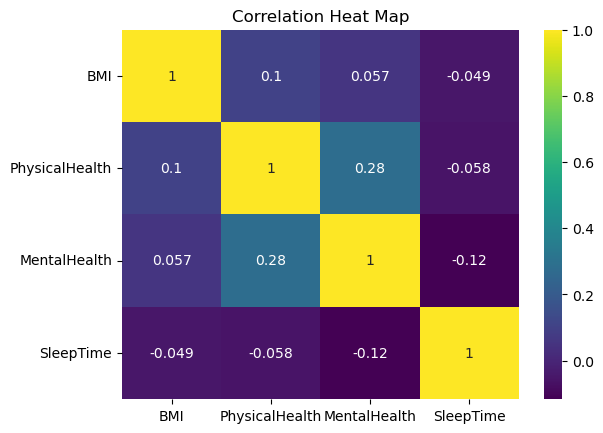

In [29]:
#correlation
num_values= healthcare_data.select_dtypes("number")
num_values.corr()
sns.heatmap(num_values.corr(), annot= True, cmap= "viridis")
plt.title("Correlation Heat Map");

The color intensity represents the strength and direction of correlations, with yellow indicating a strong positive correlation (1), dark blue indicating a weaker correlation, and purple representing negative correlations.


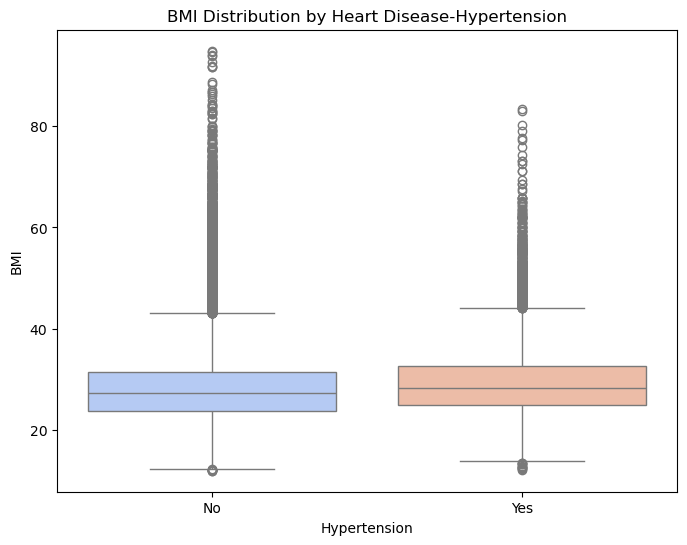

In [30]:
#BMI vs Heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x="Hypertension", y="BMI", data=healthcare_data, palette="coolwarm")
plt.title("BMI Distribution by Heart Disease-Hypertension")
plt.show()


The box plot visualizes the distribution of BMI for individuals with and without hypertension. Both groups have a similar median BMI, with inter-quartile ranges that largely overlap. However, individuals with hypertension tend to have slightly higher BMI values overall

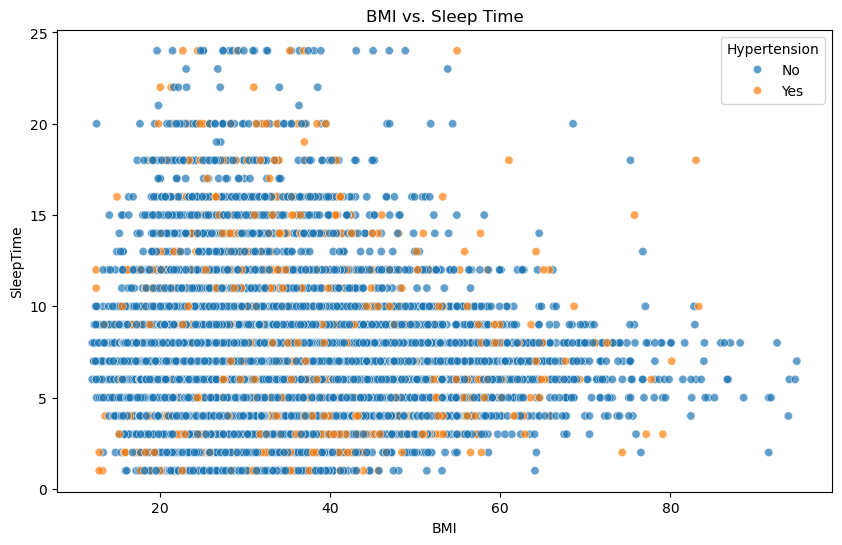

In [31]:
#BMI vs Sleeptime
plt.figure(figsize=(10, 6))
sns.scatterplot(x="BMI", y="SleepTime", hue="Hypertension", data=healthcare_data, alpha=0.7)
plt.title("BMI vs. Sleep Time")
plt.show()


This scatter plot visualizes the relationship between BMI and Sleep Time, with points color-coded to indicate whether an individual has hypertension (Yes = orange, No = blue).

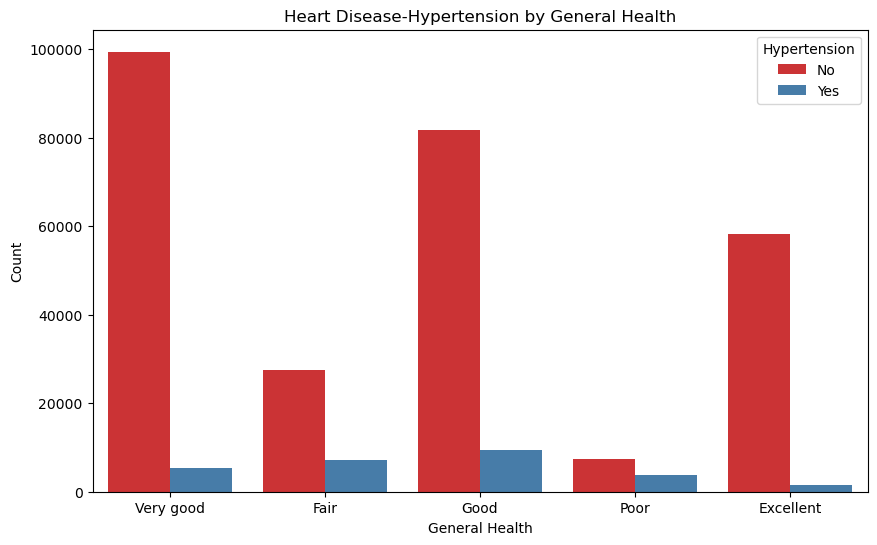

In [32]:
#GenHealth vs Heart disease
plt.figure(figsize=(10,6))
sns.countplot(x="GenHealth", hue="Hypertension", data=healthcare_data, palette="Set1")
plt.title("Heart Disease-Hypertension by General Health")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.show()


This bar chart shows the relation between General Health and Hypertension. 



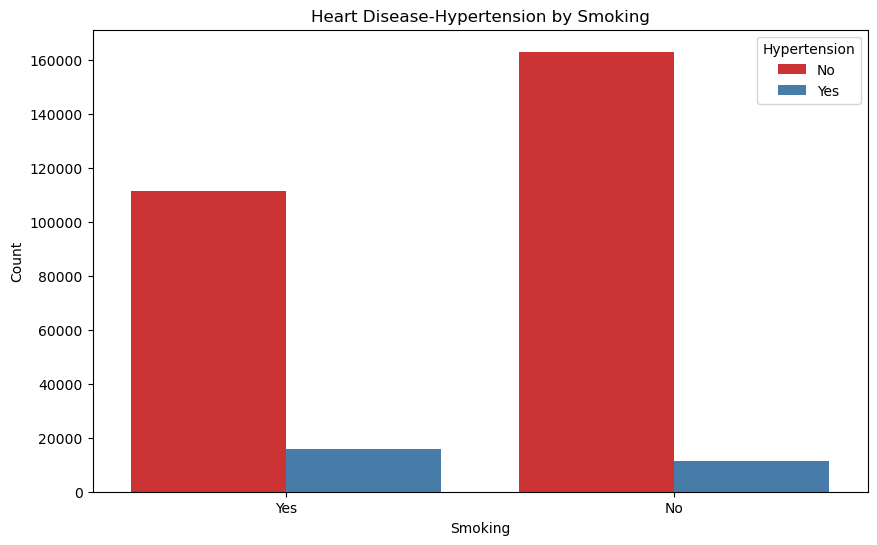

In [33]:
#Smoking vs Heart disease
plt.figure(figsize=(10,6))
sns.countplot(x="Smoking", hue="Hypertension", data=healthcare_data, palette="Set1")
plt.title("Heart Disease-Hypertension by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.show()

This bar chart visualizes the relationship between smoking status and hypertension.In both smoking and non-smoking groups, the majority of individuals do not have hypertension. The number of hypertensive individuals (blue bars) is relatively smaller in both groups. The number of hypertensive individuals is higher among smokers than non-smokers.

However, the difference is not drastically large, meaning other factors might contribute more significantly to hypertension than smoking alone

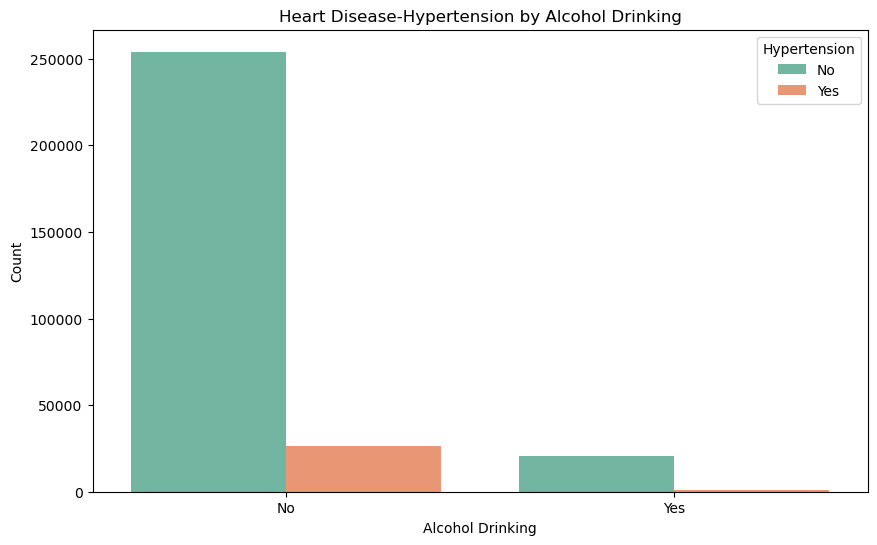

In [34]:
#AlcoholDrinking vs Heartdisease
plt.figure(figsize=(10,6))
sns.countplot(x= healthcare_data["AlcoholDrinking"], hue= healthcare_data['Hypertension'], palette='Set2')
plt.title("Heart Disease-Hypertension by Alcohol Drinking")
plt.xlabel("Alcohol Drinking")
plt.ylabel("Count");

This bar chart visualizes the relationship between alcohol drinking and hypertension. It appears that hypertension is more prevalent in non-drinkers than drinkers. However, this may be due to an imbalance in the dataset where non-drinkers significantly outnumber drinkers.

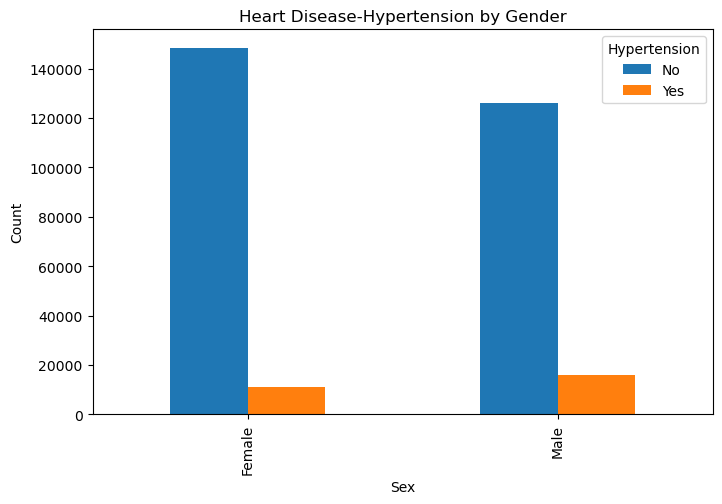

In [35]:
#Sex vs Heart disease
pd.crosstab(healthcare_data["Gender"], healthcare_data["Hypertension"]).plot(kind="bar", figsize=(8,5))
plt.title("Heart Disease-Hypertension by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


This bar chart visualizes the relationship between gender and hypertension in individuals with heart disease.The absolute count of individuals with hypertension (orange bars) appears slightly higher for males than females.

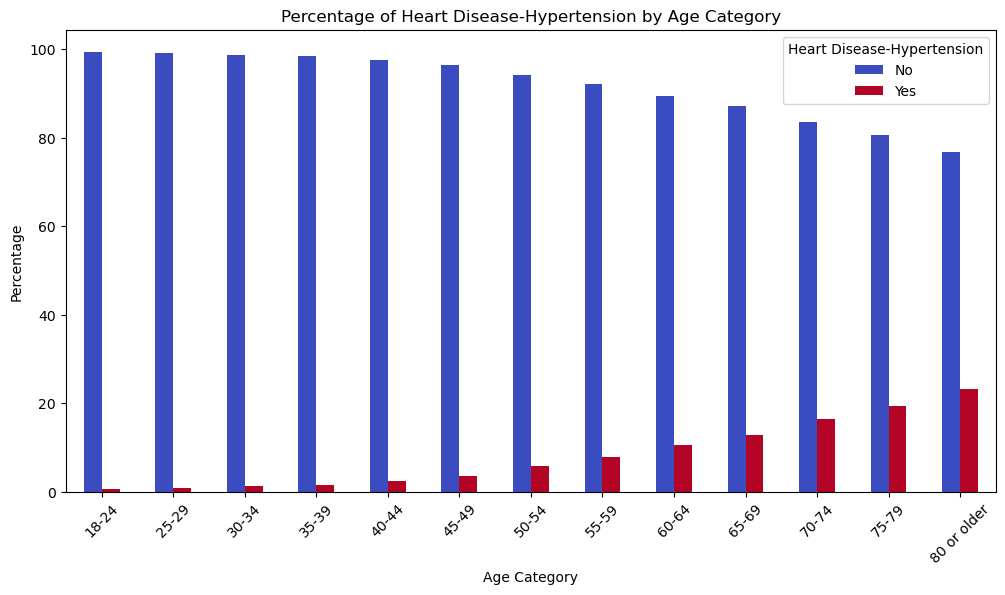

In [36]:
#Age category vs Heart disease
age_heart = pd.crosstab(healthcare_data["AgeCategory"], healthcare_data["Hypertension"], normalize="index") * 100
age_heart.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")

plt.title("Percentage of Heart Disease-Hypertension by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease-Hypertension", labels=["No", "Yes"])
plt.show()

This bar chart shows the percentage of individuals with heart disease-related hypertension across different age categories. The x-axis represents age groups, while the y-axis represents the percentage of individuals within each age category.The proportion of individuals with hypertension (red bars) is very low in younger age groups. Hypertension becomes more common in older age groups, with a significant increase after age 50.



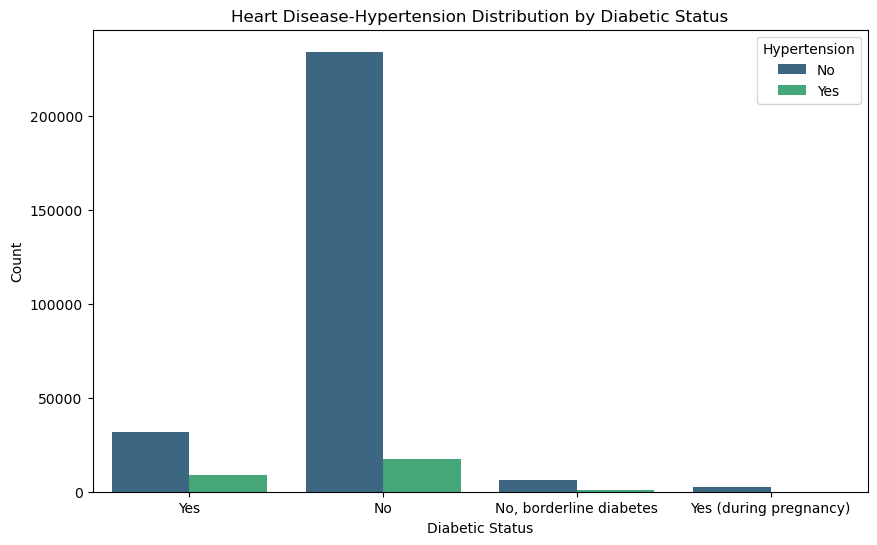

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x= healthcare_data["Diabetic"], hue= healthcare_data['Hypertension'], palette='viridis')
plt.title("Heart Disease-Hypertension Distribution by Diabetic Status")
plt.xlabel("Diabetic Status")
plt.ylabel("Count");

This bar chart shows the distribution of hypertension among individuals with different diabetic statuses. The x-axis represents diabetic status categories, while the y-axis represents count.Among individuals with diabetes ("Yes"), a higher proportion have hypertension (green bars) compared to other categories.The "No" category dominates in count, indicating that most individuals in the dataset do not have diabetes.

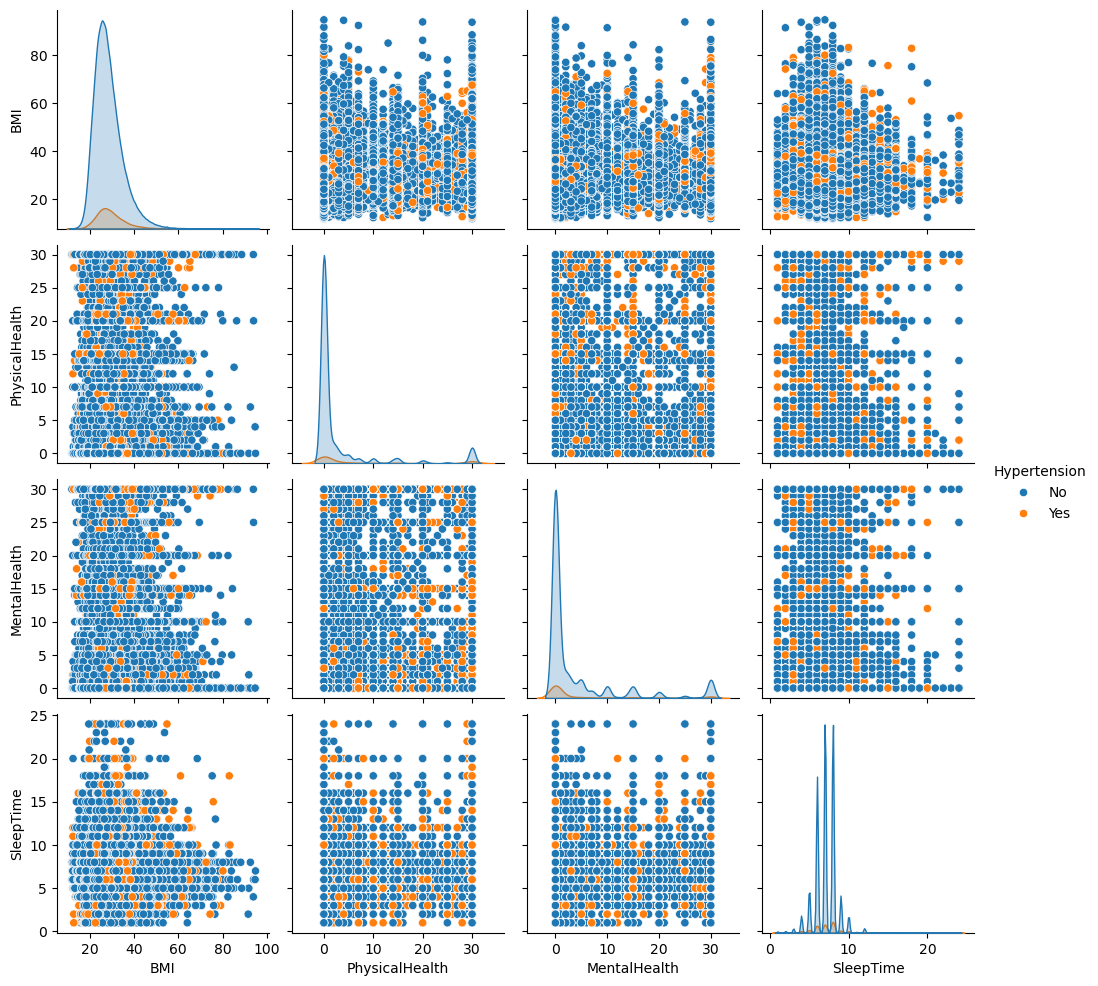

In [38]:
sns.pairplot(healthcare_data, hue="Hypertension", diag_kind="kde")
plt.show()


This pair plot visualizes the relationships between BMI, Physical Health, Mental Health, and Sleep Time, while also distinguishing between individuals with and without hypertension (orange = Yes, blue = No).

The majority of individuals have a BMI between 20 and 40. We also have a few extreme values (BMI > 80) are present.

In [39]:
healthcare_data["BMI"].sample(10)

135180    21.62
252128    22.31
42988     32.76
75857     24.33
132087    20.60
161070    22.92
208706    25.75
110349    29.05
9667      24.39
163055    33.45
Name: BMI, dtype: float64

# Feature Engineering

## Encoding categorical values

In [40]:
#Encoding binary outcomes
#Yes- 1, No-0
#Male: 1 , Female:0
#Gen-Health ['Very good- 2, 'Fair -4, 'Good-3, 'Poor- 5, 'Excellent - 1]

#HeartDisease-Hypertension
healthcare_data["Hypertension"].replace({"Yes": 1, "No": 0}, inplace=True)
#Smoking
healthcare_data["Smoking"].replace({"Yes": 1, "No": 0}, inplace=True)
#AlcoholDrinking
healthcare_data["AlcoholDrinking"].replace({"Yes":1,"No":0},inplace= True)
#Stroke
healthcare_data["Stroke"].replace({"Yes": 1, "No": 0}, inplace=True)
#DiffWalking
healthcare_data["DiffWalking"].replace({"Yes": 1, "No": 0}, inplace=True)
#Sex
healthcare_data["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
#PhysicalActivity
healthcare_data["PhysicalActivity"].replace({"Yes": 1, "No": 0}, inplace=True)
#Asthma
healthcare_data["Asthma"].replace({"Yes": 1, "No": 0}, inplace=True)
#KidneyDisease
healthcare_data["KidneyDisease"].replace({"Yes": 1, "No": 0}, inplace=True)
#SkinCancer
healthcare_data["SkinCancer"].replace({"Yes": 1, "No": 0}, inplace=True)
#GenHealth
healthcare_data["GenHealth"].replace({'Very good':2, 'Fair':4, 'Good':3, 'Poor':5, 'Excellent':1}, inplace=True)


In [41]:
#Encoding Tribe
le = LabelEncoder()
healthcare_data["Tribe"] = le.fit_transform(healthcare_data["Tribe"])

In [42]:
#Encoding age category 
healthcare_data["AgeCategory"]= le.fit_transform(healthcare_data["AgeCategory"])

In [43]:
#Encoding BMI Category
healthcare_data["BMICategory"]= le.fit_transform(healthcare_data["BMICategory"])

In [44]:
#Encoding Diabetic column
healthcare_data["Diabetic"]= le.fit_transform(healthcare_data["Diabetic"])

In [45]:
healthcare_data.sample(20)

Hypertension    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
124277             0  33.72        1                1       0               0   
244232             0  21.94        0                0       0               0   
48637              0  30.76        0                0       0               0   
215090             0  27.60        1                0       0               0   
130920             0  30.67        1                0       0               0   
83643              0  22.60        0                0       0               0   
291774             0  38.41        0                0       0              20   
173867             0  27.37        0                0       0               2   
23331              0  25.61        1                1       0               0   
171134             0  33.64        0                0       0              15   
272044             0  28.06        0                0       0               0   
229295             0  28.97        0                0       0               0   
27227              0  38.74        1                0       0              15   
198241             0  31.74        0                0       0               0   
184382             0  28.70        0                0       0               0   
291350             0  28.70        0                0       0               3   
204514             0  20.98        1                1       0               0   
155326             1  27.32        1                0       0               0   
220852             1  28.06        0                0       0               0   
298261             0  25.00        1                0       0               0   

        MentalHealth  DiffWalking  Gender  AgeCategory  Diabetic  \
124277           3.0            0       1            3         0   
244232           0.0            1       0           12         0   
48637            0.0            0       1            7         0   
215090           0.0            0       1            5         0   
130920           0.0            1       1           12         2   
83643            0.0            0       1           11         0   
291774           0.0            1       0           11         0   
173867          27.0            0       1            5         2   
23331           25.0            0       0            4         0   
171134           0.0            0       1            5         0   
272044           0.0            0       1            0         0   
229295           0.0            0       1            5         0   
27227           25.0            0       0            8         2   
198241           0.0            0       0            6         0   
184382           2.0            0       1            6         0   
291350           0.0            0       1            8         0   
204514           0.0            0       0            9         0   
155326           0.0            0       1            8         0   
220852           0.0            0       1           10         0   
298261           0.0            0       1           12         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
124277                 1          2        7.0       1              0   
244232                 0          3        8.0       0              0   
48637                  1          1        7.0       0              0   
215090                 1          2        6.0       0              0   
130920                 1          4       10.0       0              0   
83643                  0          2        8.0       0              0   
291774                 0          3        7.0       1              0   
173867                 0          4        7.0       0              0   
23331                  1          2        5.0       0              0   
171134                 1          4        6.0       0              0   
272044                 1          3        6.0       1              0   
2

We have encoded our data into numerical values

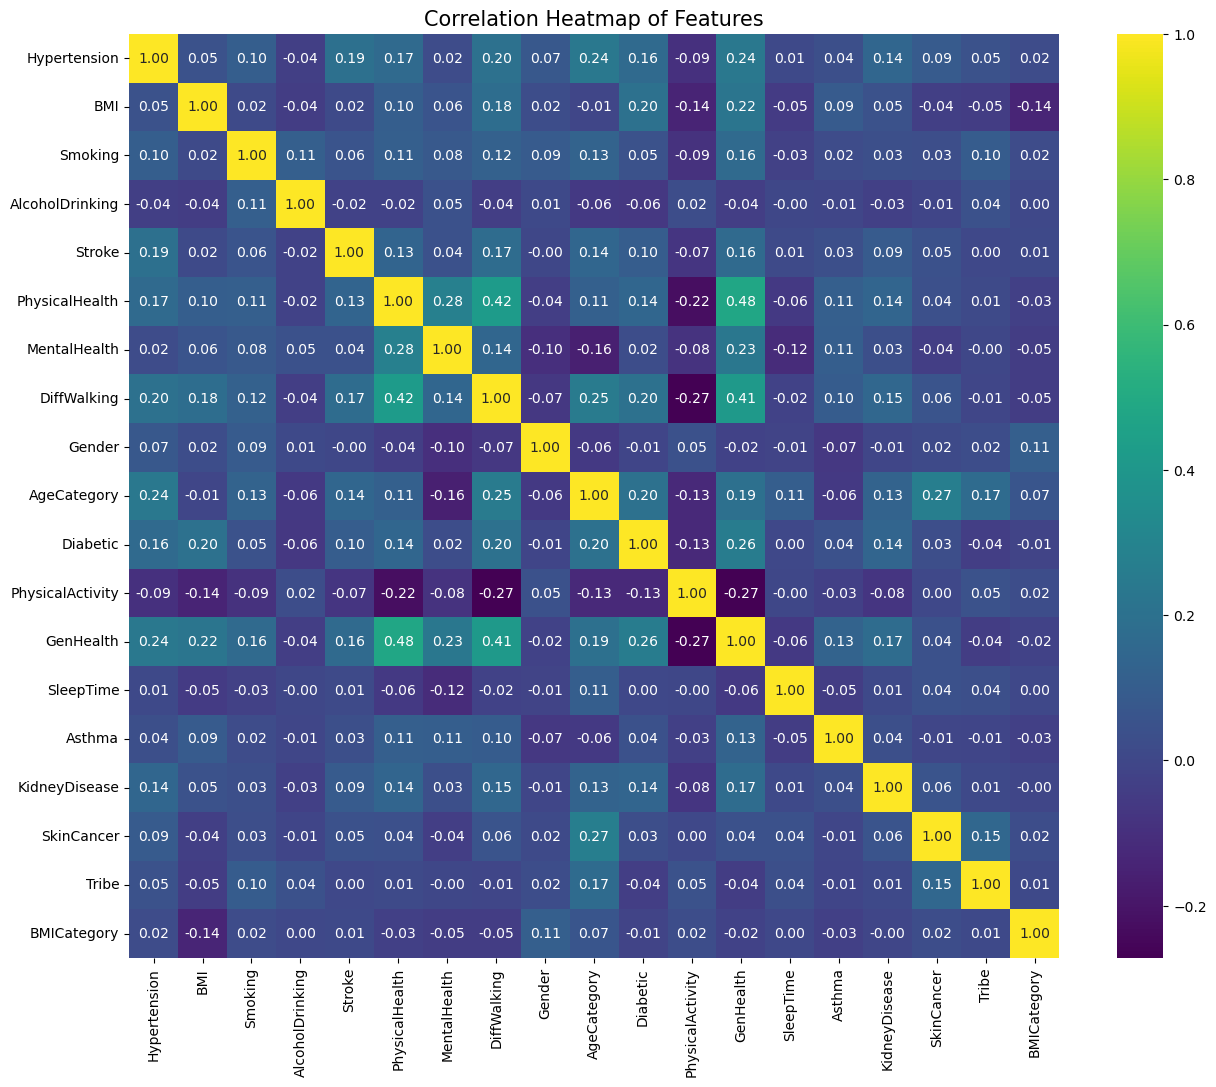

In [46]:
#Correlation of features with Hypertension
plt.figure(figsize= (15,12))
sns.heatmap(healthcare_data. select_dtypes("number").corr(), annot= True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap of Features", fontsize= 15);

AgeCategory (+0.24) → Older individuals are more likely to have hypertension.
Difficulty Walking (+0.18) → Mobility issues are associated with higher hypertension risk.
Stroke (+0.17) → History of stroke strongly increases hypertension risk.

In [47]:
#Risk Profiling
#Calculate RiskScore based on BMI, lifestyle, and medical history.
#Categorize individuals into Low, Moderate, High, and Very High risk.

# Function to Calculate Risk Score
def calculate_risk_score(row):
    score = 0

    # BMI risk (higher weight for obesity)
    if row["BMI"] >= 30:
        score += 3  # Obese
    elif row["BMI"] >= 25:
        score += 2  # Overweight
    
    # Lifestyle risk factors
    score += row["Smoking"] * 2  # Smoking adds risk
    score += row["AlcoholDrinking"] * 2  # Alcohol adds risk
    if row["PhysicalActivity"] == 0:  
        score += 2  # No physical activity adds risk
    
    # Medical history risk factors
    score += row["Diabetic"] * 3  
    score += row["Stroke"] * 3 
    score += row["KidneyDisease"] * 3 
    
    return score

# Apply Risk Scoring Function
healthcare_data["RiskScore"] = healthcare_data.apply(calculate_risk_score, axis=1)

# Categorize into Risk Levels 
healthcare_data["RiskCategory"] = pd.cut(
    healthcare_data["RiskScore"],
    bins=[-1, 3, 7, 11, 20], 
    labels=["Low", "Moderate", "High", "Very High"]
)

# Distribution of Risk Categories
risk_distribution = healthcare_data["RiskCategory"].value_counts()
print(risk_distribution)

RiskCategory
Low          142896
Moderate     108566
High          36298
Very High     13955
Name: count, dtype: int64


Risk Score Logic: Each risk factor (BMI, smoking, alcohol, lack of exercise, diabetes, stroke, kidney disease) is assigned a weight based on its impact on heart disease and hypertension.
3 is a higher weight and is given to those with a very high risk 
2 is a lower weight and is given to those with a moderately increased risk
Cut Points: The bins are chosen to group individuals with similar scores into Low, Moderate, High, and Very High risk.

Our function starts each individual’s risk score at zero.
If BMI is ≥ 30, 3 points are added (indicating obesity).
If BMI is ≥ 25 (but < 30), 2 points are added (indicating overweight).
Smoking and alcohol consumption each add 2 points if row["Smoking"] or row["AlcoholDrinking"] is 1 (Yes).
If PhysicalActivity is 0 (No), an additional 2 points are added.
Studies show that smoking, alcohol use, and sedentary lifestyles increase the risk of cardiovascular diseases.
Diabetes, stroke history, and kidney disease each add 3 points if the value is 1 (Yes).
Individuals with these conditions have a significantly higher risk of heart disease, hypertension, and related complications that's why we used 3

The final risk score is a sum of all these factors.



In [48]:
healthcare_data.dropna(subset=["RiskCategory"], inplace=True)


In [49]:
healthcare_data["RiskCategory"].isna().sum()

0

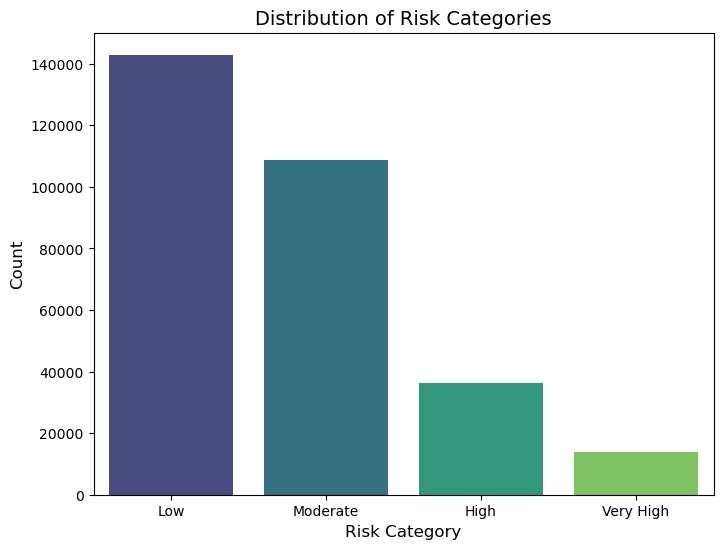

In [50]:
# Distribution of Risk Categories
plt.figure(figsize=(8, 6))
sns.barplot(
    x=risk_distribution.index,
    y=risk_distribution.values,
    palette="viridis"
)

plt.xlabel("Risk Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Risk Categories", fontsize=14)
plt.show()

This bar chart shows the distribution of the risk category. Low risk category has the highest count followed by moderate

In [51]:
# Filter high-risk individuals
high_risk = healthcare_data[healthcare_data["RiskCategory"].isin(["High", "Very High"])]

# Summary statistics of key factors
high_risk_summary = high_risk[["BMI", "Smoking", "AlcoholDrinking", "Diabetic", "Stroke", "KidneyDisease"]].mean()
print(high_risk_summary)


BMI                32.091623
Smoking             0.555211
AlcoholDrinking     0.074543
Diabetic            1.749667
Stroke              0.137683
KidneyDisease       0.146738
dtype: float64


Patients with a high BMI are high risk individuals

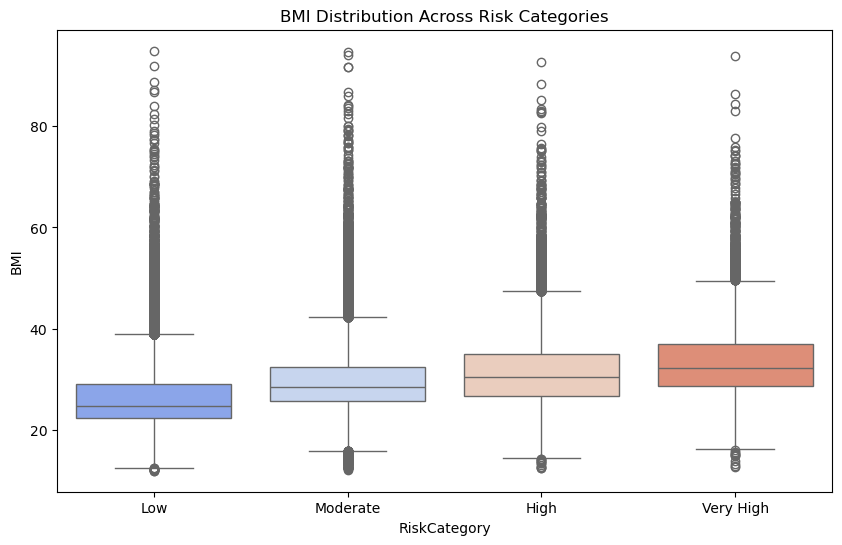

In [52]:
# Compare high-risk vs. low-risk groups
plt.figure(figsize=(10, 6))
sns.boxplot(x=healthcare_data["RiskCategory"], y=healthcare_data["BMI"], palette="coolwarm")
plt.title("BMI Distribution Across Risk Categories")
plt.show()


This  box plot shows the distribution of BMI (Body Mass Index) across different risk categories based on the risk profiling model. As risk increases, BMI variability also grows, reinforcing the model’s assumption that obesity significantly contributes to health risk


In [68]:
#Encode the risk category
healthcare_data["RiskCategory"]= le.fit_transform(healthcare_data["RiskCategory"])

In [69]:
#Separating Features and target
X = healthcare_data.drop(columns=["Hypertension"])  
y = healthcare_data["Hypertension"]
print("Shape of X", X.shape)
print("Shape of y", y.shape)



Shape of X (301715, 20)
Shape of y (301715,)


In [75]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Model Training

In [82]:
#Goal: Predict hypertension progression using Logistic Regression and Decision Trees.
# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratified to maintain class distribution

In [83]:
#Undersampling our data
under_sampler= RandomUnderSampler(random_state=42)
X_train_under, y_train_under= under_sampler.fit_resample(X_train,y_train)

In [84]:
# Standardize numerical features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

In [85]:
#Baseline model
y_train_series = pd.Series(y_train_under)
y_train_series.value_counts(normalize=True) * 100

Hypertension
0    50.0
1    50.0
Name: proportion, dtype: float64

In [86]:
#Model Initialization
log_reg = LogisticRegression(max_iter=200)
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
rf= RandomForestClassifier(n_estimators=50, random_state=42)
#Model Training
log_reg.fit(X_train_scaled, y_train_under)
decision_tree.fit(X_train_under, y_train_under)
rf.fit(X_train_under,y_train_under)

RandomForestClassifier(n_estimators=50, random_state=42)

In [87]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_tree = decision_tree.predict(X_test)
y_pred_rf= rf.predict(X_test)

print("Logistic Regression predictions", y_pred_log_reg)
print("DecisionTreeClassifier predictions", y_pred_tree)
print("RandomForest predictions", y_pred_rf)

Logistic Regression predictions [0 0 0 ... 1 0 1]
DecisionTreeClassifier predictions [0 0 0 ... 1 0 1]
RandomForest predictions [0 0 0 ... 0 0 1]


In [88]:
#Model Evaluation

print("📌 Logistic Regression Performance:")
print ("Accuracy", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


print("\n📌 Decision Tree Performance:")
print ("Accuracy", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


print("\n📌 Random Forest Performance:")
print ("Accuracy", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

📌 Logistic Regression Performance:
Accuracy 0.7461180252887659
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54891
           1       0.23      0.78      0.36      5452

    accuracy                           0.75     60343
   macro avg       0.60      0.76      0.60     60343
weighted avg       0.90      0.75      0.80     60343


📌 Decision Tree Performance:
Accuracy 0.7335565019969176
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     54891
           1       0.22      0.77      0.34      5452

    accuracy                           0.73     60343
   macro avg       0.60      0.75      0.59     60343
weighted avg       0.90      0.73      0.79     60343


📌 Random Forest Performance:
Accuracy 0.7192714979367947
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     54891
           1       0.21      0.76      0.33      5452

   

In [96]:
#Hypertuning the model

#creating parameters
params_lg = {
    "max_iter":range(25,100,25)
}
params_dt = {
  "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

params_rf= {
    "max_depth": range(10,50,10),
    "n_estimators": range(25,50,100)
    
}

grid_lg = GridSearchCV(log_reg, params_lg, cv=5, scoring='accuracy')
grid_dt = GridSearchCV(decision_tree, params_dt, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')

# Train models with hyperparameter tuning
grid_lg.fit(X_train_scaled, y_train_under)
grid_dt.fit(X_train_under, y_train_under)
grid_rf.fit(X_train_under, y_train_under)

# Get best parameters and scores
print("Best Logistic Regression Params:", grid_lg.best_params_)
print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Random Forest Params:", grid_rf.best_params_)

best_lg = grid_lg.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_
# Predictions
y_pred_lg = best_lg.predict(X_test_scaled)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Performance Evaluation
print("\n📌 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

print("\n📌 Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\n📌 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best Logistic Regression Params: {'max_iter': 25}
Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 25}

📌 Logistic Regression Performance:
Accuracy: 0.7461180252887659
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54891
           1       0.23      0.78      0.36      5452

    accuracy                           0.75     60343
   macro avg       0.60      0.76      0.60     60343
weighted avg       0.90      0.75      0.80     60343


📌 Decision Tree Performance:
Accuracy: 0.7335565019969176
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     54891
           1       0.22      0.77      0.34      5452

    accuracy                           0.73     60343
   macro avg       0.60      0.75      0.59     60343
weighted avg       0.90      0.73      0.79     60343


📌 Random Forest

The best performing model is LogisticRegression with 75% accuracy

In [116]:
#Save Model
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

In [117]:
#Load the model
with open("model.pkl", "rb") as file:
    loaded_model= pickle.load(file)
    print(loaded_model)

LogisticRegression(max_iter=200)


In [112]:
def generate_interventions(row):
    interventions = []
    
    # High-risk priority actions
    if row["RiskCategory"] == "High":
        interventions.append("Priority clinic referral")
        interventions.append("Weekly follow-up calls")
        
    # Lifestyle recommendations
    if row["BMI"] >= 30:
        interventions.append("Customized diet plan (low sodium)")
    if row["PhysicalActivity"] == "Sedentary":
        interventions.append("Daily 30-min walking program")
        
    # Condition-specific
    if row["Diabetic"] == 1:
        interventions.append("Glucose monitoring kit")
    if row["Smoking"] == 1:
        interventions.append("Smoking cessation program")
        
    # Prediction-based
    #if row["Predicted_Progression"] == 1:
       # interventions.append("Medication adherence SMS alerts")
        
    return ", ".join(interventions)

healthcare_data["Recommendations"] = healthcare_data.apply(generate_interventions, axis=1)

In [114]:
def get_recommendation(risk_category):
    if risk_category == "Low":
        return "Maintain a healthy lifestyle with regular exercise and balanced diet."
    elif risk_category == "Moderate":
        return "Increase physical activity, reduce processed foods, and monitor blood pressure."
    elif risk_category == "High":
        return "Schedule a medical check-up, adopt a strict healthy diet, and track symptoms."
    elif risk_category == "Very High":
        return "Urgent doctor consultation required. Medication adherence and regular check-ups are necessary."
    else:
        return "No recommendation available."


healthcare_data["Intervention"] = healthcare_data["RiskCategory"].apply(get_recommendation)

healthcare_data[["RiskCategory", "Intervention"]].drop_duplicates()

RiskCategory                  Intervention
0             0  No recommendation available.
1             1  No recommendation available.
5             2  No recommendation available.
7             3  No recommendation available.

In [119]:
import joblib
# Save the trained model
joblib.dump(log_reg, "best_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [108]:
pip install streamlit

   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ---------------------------------------- 53.0/53.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st
# Load trained model
model = joblib.load("model.pkl")  

# Streamlit UI
st.title("Disease Risk Prediction App 🚀")
st.write("Enter your health details to predict your disease progression risk.")

# User Inputs
BMI = st.number_input("BMI", min_value=10.0, max_value=50.0, step=0.1)
Smoking = st.selectbox("Do you smoke?", [0, 1])
AlcoholDrinking = st.selectbox("Do you drink alcohol?", [0, 1])
PhysicalActivity = st.selectbox("Do you engage in physical activity?", [0, 1])
SleepTime = st.slider("Hours of sleep per day", 0, 24, 8)
Diabetic = st.selectbox("Are you diabetic?", [0, 1])
Stroke = st.selectbox("Have you had a stroke?", [0, 1])
KidneyDisease = st.selectbox("Do you have kidney disease?", [0, 1])
DiffWalking = st.selectbox("Do you have difficulty walking?", [0, 1])

# Convert input into an array
user_input = np.array([[BMI, Smoking, AlcoholDrinking, PhysicalActivity, SleepTime, Diabetic, Stroke, KidneyDisease, DiffWalking]])

# Predict Risk Category
if st.button("Predict Risk"):
    prediction = model.predict(user_input)[0]
    risk_labels = ["Low", "Moderate", "High", "Very High"]
    st.success(f"Predicted Risk Category: **{risk_labels[prediction]}**")
